In [2]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, hstack
from scipy.io import mmread, mmwrite
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
# from scipy import sparse
import plotly.express as px
from scipy import sparse
import png
import math
import scipy.linalg as LA
import nodevectors
from sklearn.decomposition import PCA
import seaborn as sns
from tabulate import tabulate

In [2]:
animationData = pd.read_csv("animationDataUK.csv")

In [3]:
animationData.shape

(2280, 12)

In [4]:
fig = px.scatter(animationData, x="dim3", y="dim4",
                color="col", 
                color_discrete_sequence=animationData["col"], 
                 animation_frame="year", hover_data=["LAD", "col"], 
                text="LAD3_4",
                labels = {
                    "dim3": "Dimension 3", 
                    "dim4": "Dimension 4"})

# fig.update_yaxes(autorange="reversed")
fig.update_xaxes(autorange="reversed")
fig.update_layout(showlegend=False)
fig.update_xaxes(range = [max(animationData["dim3"]), min(animationData["dim3"])] )
fig.update_yaxes(range = [min(animationData["dim4"]), max(animationData["dim4"])] )

fig.show(renderer="browser")

In [5]:
fig1 = px.scatter(animationData, x="dim1", y="dim2",
                color="col", 
                color_discrete_sequence=animationData["col"], 
                 animation_frame="year", hover_data=["LAD", "col"], 
                text="LAD1_2",
                 labels = {
                    "dim1": "Dimension 1", 
                    "dim2": "Dimension 2"})
fig1.update_layout(showlegend=False)
fig1.update_xaxes(range = [min(animationData["dim1"]), max(animationData["dim1"])] )
fig1.update_yaxes(range = [min(animationData["dim2"]), max(animationData["dim2"])] )
fig1.update_traces(textposition="top center")

fig1.show(renderer="browser")

Text(0.5, 1.0, 'Dimension 1 Values')

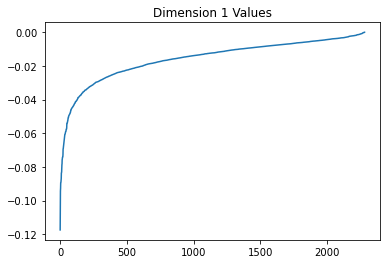

In [6]:
dist_data = animationData.copy()
dist_data = dist_data.sort_values(by="dim1")
plt.plot(dist_data["dim1"].values)
plt.title("Dimension 1 Values")

In [4]:
enterprises_2010 = pd.read_csv("count_of_active_enterprises_2010_byLAD_UK.csv")

In [5]:
enterprises_2010["LAD_clean"] = enterprises_2010["LAD"].str.strip()

In [6]:
enterprises_2010["LAD_clean"] = enterprises_2010["LAD_clean"].str.replace(" UA", "")
enterprises_2010["LAD_clean"] = enterprises_2010["LAD_clean"].str.replace("&", "and")
# enterprises_2010["LAD_clean"] = enterprises_2010["LAD_clean"].str.replace(",", "")

In [7]:
enterprises_2010["LAD_clean"] = enterprises_2010["LAD_clean"].str.strip()

In [8]:
enterprises_2010.head(5)

,LAD,count of active enterprises,LAD_clean
0,County Durham UA,12300,County Durham
1,Darlington UA,3005,Darlington
2,Hartlepool UA,2060,Hartlepool
3,Middlesbrough UA,2820,Middlesbrough
4,Northumberland UA,9595,Northumberland


In [9]:
# how to find the 3 odd things identified

# enterprises_2010[enterprises_2010["LAD_clean"]=="Eilean Siar"]

In [10]:
enterprises_2010.at[291, "LAD_clean"] = "Bristol, City of"
enterprises_2010.at[341, "LAD_clean"] = "Rhondda Cynon Taf"
enterprises_2010.at[112, "LAD_clean"] = "Herefordshire, County of"
enterprises_2010.at[359, "LAD_clean"] = "City of Edinburgh"
enterprises_2010.at[373, "LAD_clean"] = "Scottish Borders"
enterprises_2010.at[360, "LAD_clean"] = "Na h-Eileanan Siar"

In [11]:
enterprises_2010.shape

(380, 3)

In [12]:
enterprises_2010.to_csv("count_of_active_enterprises_2010_byLAD_GB_CLEAN.csv")

In [15]:
# get the 2010 data
animationData2010 = animationData[animationData["year"]==2010]

In [16]:
animationData2010 = pd.merge(animationData2010, enterprises_2010, how="left", left_on = "LAD", right_on ="LAD_clean")

In [17]:
# this was used to find where the names of the LADs in the 2 dataframes had a discrepancy in spelling/ use of a comma

animationData2010[animationData2010["LAD_x"] != animationData2010["LAD_clean"]]

,Unnamed: 0,dim1,dim2,dim3,dim4,year,Xscaled,Yscaled,LAD_x,col,LAD3_4,LAD1_2,LAD_y,count of active enterprises,LAD_clean


In [18]:
animationData2010 = animationData2010.drop(columns=["LAD_y"])

animationData2010 = animationData2010.rename(columns={"LAD_x" : "LAD"})

In [19]:
animationData2010.shape # should be 380

(380, 14)

In [20]:
animationData2010['count of active enterprises'] = animationData2010['count of active enterprises'].str.replace(",", "")

In [21]:
fig3 = px.scatter(animationData2010, x="dim1", y="dim2",
                color="count of active enterprises", 
                #color_discrete_sequence=animationData["col"], 
                 #animation_frame="year", 
                  hover_data=["LAD", "count of active enterprises"], 
                text="LAD1_2",
                 labels = {
                    "dim1": "Dimension 1", 
                    "dim2": "Dimension 2"})
fig3.update_layout(showlegend=False)
fig3.update_xaxes(range = [min(animationData["dim1"]), max(animationData["dim1"])] )
fig3.update_yaxes(range = [min(animationData["dim2"]), max(animationData["dim2"])] )
fig3.update_traces(textposition="top center")

fig3.show(renderer="browser")

## 2009 and 2010 with enterprise data and a 2 slide animation

In [13]:
enterprises_2009 = pd.read_csv("count_of_active_enterprises_2009_byLAD_UK.csv")

In [14]:
enterprises_2009["LAD_clean"] = enterprises_2009["LAD"].str.strip()

In [15]:
enterprises_2009["LAD_clean"] = enterprises_2009["LAD_clean"].str.replace(" UA", "")
enterprises_2009["LAD_clean"] = enterprises_2009["LAD_clean"].str.replace("&", "and")
# enterprises_2009["LAD_clean"] = enterprises_2009["LAD_clean"].str.replace(",", "")

In [16]:
enterprises_2009["LAD_clean"] = enterprises_2009["LAD_clean"].str.strip()

In [17]:
enterprises_2009.at[291, "LAD_clean"] = "Bristol, City of"
enterprises_2009.at[341, "LAD_clean"] = "Rhondda Cynon Taf"
enterprises_2009.at[112, "LAD_clean"] = "Herefordshire, County of"
enterprises_2009.at[359, "LAD_clean"] = "City of Edinburgh"
enterprises_2009.at[373, "LAD_clean"] = "Scottish Borders"
enterprises_2009.at[360, "LAD_clean"] = "Na h-Eileanan Siar"

In [20]:
enterprises_2009.to_csv("count_of_active_enterprises_2009_byLAD_GB_CLEAN.csv")

In [18]:
# get the 2009 data
animationData2009 = animationData[animationData["year"]==2009]

NameError: name 'animationData' is not defined

In [19]:
animationData2009 = pd.merge(animationData2009, enterprises_2009, how="inner", left_on = "LAD", right_on ="LAD_clean")

NameError: name 'animationData2009' is not defined

In [29]:
animationData2009.shape # all there

(380, 15)

In [30]:
animationData2009 = animationData2009.drop(columns=["LAD_y"])

animationData2009 = animationData2009.rename(columns={"LAD_x" : "LAD"})

In [31]:
animationData2009['count of active enterprises'] = animationData2009['count of active enterprises'].str.replace(",", "")

### Merge 2009 and 2010 data together

In [32]:
animData2009_2010 = pd.concat([animationData2009,animationData2010])

In [33]:
animData2009_2010['count of active enterprises'] = animData2009_2010['count of active enterprises'].astype(int)

In [34]:
animData2009_2010.head()

,Unnamed: 0,dim1,dim2,dim3,dim4,year,Xscaled,Yscaled,LAD,col,LAD3_4,LAD1_2,count of active enterprises,LAD_clean
0,1521,-0.060120,0.039137,-0.072439,0.018038,2009,0.801441,0.145821,Westminster,#CC3325,Westminster,Westminster,47010,Westminster
1,1522,-0.022630,-0.022009,-0.011417,0.005299,2009,0.811587,0.142026,Southwark,#CF3324,NaN,NaN,13240,Southwark
2,1523,-0.026067,-0.027854,-0.026364,0.002793,2009,0.797883,0.144591,Kensington and Chelsea,#CB3325,NaN,NaN,12335,Kensington and Chelsea
3,1524,-0.021785,-0.043647,0.000383,0.016923,2009,0.815852,0.146336,Tower Hamlets,#D03325,NaN,NaN,11880,Tower Hamlets
4,1525,-0.036306,0.030706,-0.019514,-0.014201,2009,0.604415,0.238420,Birmingham,#9A333D,NaN,NaN,30840,Birmingham


In [35]:
# add a log10 of count of active enterprise
animData2009_2010["log10 count of active enterprises"] = np.log10(animData2009_2010["count of active enterprises"])

In [36]:
animData2009_2010.head()

,Unnamed: 0,dim1,dim2,dim3,dim4,year,Xscaled,Yscaled,LAD,col,LAD3_4,LAD1_2,count of active enterprises,LAD_clean,log10 count of active enterprises
0,1521,-0.060120,0.039137,-0.072439,0.018038,2009,0.801441,0.145821,Westminster,#CC3325,Westminster,Westminster,47010,Westminster,4.672190
1,1522,-0.022630,-0.022009,-0.011417,0.005299,2009,0.811587,0.142026,Southwark,#CF3324,NaN,NaN,13240,Southwark,4.121888
2,1523,-0.026067,-0.027854,-0.026364,0.002793,2009,0.797883,0.144591,Kensington and Chelsea,#CB3325,NaN,NaN,12335,Kensington and Chelsea,4.091139
3,1524,-0.021785,-0.043647,0.000383,0.016923,2009,0.815852,0.146336,Tower Hamlets,#D03325,NaN,NaN,11880,Tower Hamlets,4.074816
4,1525,-0.036306,0.030706,-0.019514,-0.014201,2009,0.604415,0.238420,Birmingham,#9A333D,NaN,NaN,30840,Birmingham,4.489114


In [37]:
fig4 = px.scatter(animData2009_2010, x="dim1", y="dim2",
                color="log10 count of active enterprises", 
                 animation_frame="year", hover_data=["LAD", "log10 count of active enterprises", "year"], 
                text="LAD1_2",
                 labels = {
                    "dim1": "Dimension 1", 
                    "dim2": "Dimension 2"})
fig4.update_layout(showlegend=False)
fig4.update_xaxes(range = [min(animationData["dim1"]), max(animationData["dim1"])] )
fig4.update_yaxes(range = [min(animationData["dim2"]), max(animationData["dim2"])] )
fig4.update_traces(textposition="top center")

fig4.show(renderer="browser")

In [38]:
fig4.write_html("LAD2009_2010_log10_enterpriseColouring_UK.html")
# this is in folder 15

### Ed says the plotly can't change the colours of nodes over time, so these are coloured at both times by their count of active enterprises in 2009

### Colouring by pay
01/12/2022

In [4]:
# Read in file
pay_2010 = pd.read_csv("Annual_pay-Gross-all_employee_jobsUK2010.csv", encoding= 'unicode_escape')

In [5]:
pay_2010["LAD_clean"] = pay_2010["Description"].str.strip()

In [6]:
pay_2010["LAD_clean"] = pay_2010["LAD_clean"].str.replace(" UA", "")

pay_2010["LAD_clean"] = pay_2010["LAD_clean"].str.replace("&", "and")

In [7]:
pay_2010["LAD_clean"] = pay_2010["LAD_clean"].str.strip()

In [8]:
pay_2010a = pay_2010.merge(enterprises_2010, left_on="LAD_clean", right_on="LAD_clean", how="inner")

NameError: name 'enterprises_2010' is not defined

In [9]:
pay_2010a.shape

NameError: name 'pay_2010a' is not defined

In [11]:
pay_2010.to_csv("CleanedMedianMeanPay2010.csv")

In [230]:
# used this to change edinburg and eilean siar in the csv so they matched

# pay_2010a[pay_2010a['Median'].isna()]

,Description,Median,Mean,LAD_clean,LAD,count of active enterprises


In [231]:
animationDataPay = pd.merge(animationData, pay_2010a, how="inner", left_on = "LAD", right_on ="LAD_clean")

In [232]:
animationDataPay.shape

(2280, 18)

In [233]:
animationDataPay.head()

,Unnamed: 0,dim1,dim2,dim3,dim4,year,Xscaled,Yscaled,LAD_x,col,LAD3_4,LAD1_2,Description,Median,Mean,LAD_clean,LAD_y,count of active enterprises
0,1,-0.105363,0.122562,-0.114425,0.000447,2005,0.801441,0.145821,Westminster,#CC3325,Westminster,Westminster,Westminster,39948,80634,Westminster,Westminster,47465
1,381,-0.067441,0.072397,-0.063633,-0.002887,2006,0.801441,0.145821,Westminster,#CC3325,Westminster,Westminster,Westminster,39948,80634,Westminster,Westminster,47465
2,761,-0.078193,0.056476,-0.080979,-0.000846,2007,0.801441,0.145821,Westminster,#CC3325,Westminster,Westminster,Westminster,39948,80634,Westminster,Westminster,47465
3,1141,-0.117482,0.180956,-0.117923,-0.029010,2008,0.801441,0.145821,Westminster,#CC3325,Westminster,Westminster,Westminster,39948,80634,Westminster,Westminster,47465
4,1521,-0.060120,0.039137,-0.072439,0.018038,2009,0.801441,0.145821,Westminster,#CC3325,Westminster,Westminster,Westminster,39948,80634,Westminster,Westminster,47465


In [234]:
animationDataPay = animationDataPay.drop(columns=["LAD_y", 'Description', 'LAD_x'])

animationDataPay = animationDataPay.rename(columns={"LAD_clean" : "LAD"})

In [235]:
# change where there is an 'x' for no data, to a 0
animationDataPay["Mean"] = animationDataPay["Mean"].str.replace("x", '0')
animationDataPay["Median"] = animationDataPay["Median"].str.replace("x", '0')
# animationDataPay["Mean"] = animationDataPay["Mean"].str.replace("", '0')
# animationDataPay["Median"] = animationDataPay["Median"].str.replace("", '0')

animationDataPay["Mean"] = animationDataPay["Mean"].astype(int)
animationDataPay["Median"] = animationDataPay["Median"].astype(int)

In [236]:
fig5 = px.scatter(animationDataPay, x="dim1", y="dim2",
                color="Mean", 
                #color_discrete_sequence=animationData["col"], 
                 animation_frame="year", hover_data=["LAD", "Mean", 'Median'], 
                text="LAD1_2",
                 labels = {
                    "dim1": "Dimension 1", 
                    "dim2": "Dimension 2"})
fig5.update_layout(showlegend=False)
fig5.update_xaxes(range = [min(animationData["dim1"]), max(animationData["dim1"])] )
fig5.update_yaxes(range = [min(animationData["dim2"]), max(animationData["dim2"])] )
fig5.update_traces(textposition="top center")

fig5.show(renderer="browser")

In [149]:
fig5.write_html("PC1_2_MeanPayColour.html")

In [237]:
fig6 = px.scatter(animationDataPay, x="dim1", y="dim2",
                color="Median", 
                #color_discrete_sequence=animationData["col"], 
                 animation_frame="year", hover_data=["LAD", "Mean", 'Median'], 
                text="LAD1_2",
                 labels = {
                    "dim1": "Dimension 1", 
                    "dim2": "Dimension 2"})
fig6.update_layout(showlegend=False)
fig6.update_xaxes(range = [min(animationData["dim1"]), max(animationData["dim1"])] )
fig6.update_yaxes(range = [min(animationData["dim2"]), max(animationData["dim2"])] )
fig6.update_traces(textposition="top center")

fig6.show(renderer="browser")

In [151]:
fig6.write_html("PC1_2_MedianPayColour.html")

Taking the log10 made it harder not easier to visualise things

Note that the blue dots, at 0, are for LADs where there is no data provided.